In [52]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

In [53]:
df = pd.read_csv("../input/raw_dataset/bank-additional/bank-additional-full.csv", na_values="unknown", sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [12]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
age,41188.000000,40.024060,10.421250,17.000000,32.000000,38.000000,47.000000,98.000000
duration,41188.000000,258.285010,259.279249,0.000000,102.000000,180.000000,319.000000,4918.000000
campaign,41188.000000,2.567593,2.770014,1.000000,1.000000,2.000000,3.000000,56.000000
pdays,41188.000000,962.475454,186.910907,0.000000,999.000000,999.000000,999.000000,999.000000
previous,41188.000000,0.172963,0.494901,0.000000,0.000000,0.000000,0.000000,7.000000
emp.var.rate,41188.000000,0.081886,1.570960,-3.400000,-1.800000,1.100000,1.400000,1.400000
cons.price.idx,41188.000000,93.575664,0.578840,92.201000,93.075000,93.749000,93.994000,94.767000
cons.conf.idx,41188.000000,-40.502600,4.628198,-50.800000,-42.700000,-41.800000,-36.400000,-26.900000
euribor3m,41188.000000,3.621291,1.734447,0.634000,1.344000,4.857000,4.961000,5.045000
nr.employed,41188.000000,5167.035911,72.251528,4963.600000,5099.100000,5191.000000,5228.100000,5228.100000


In [56]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


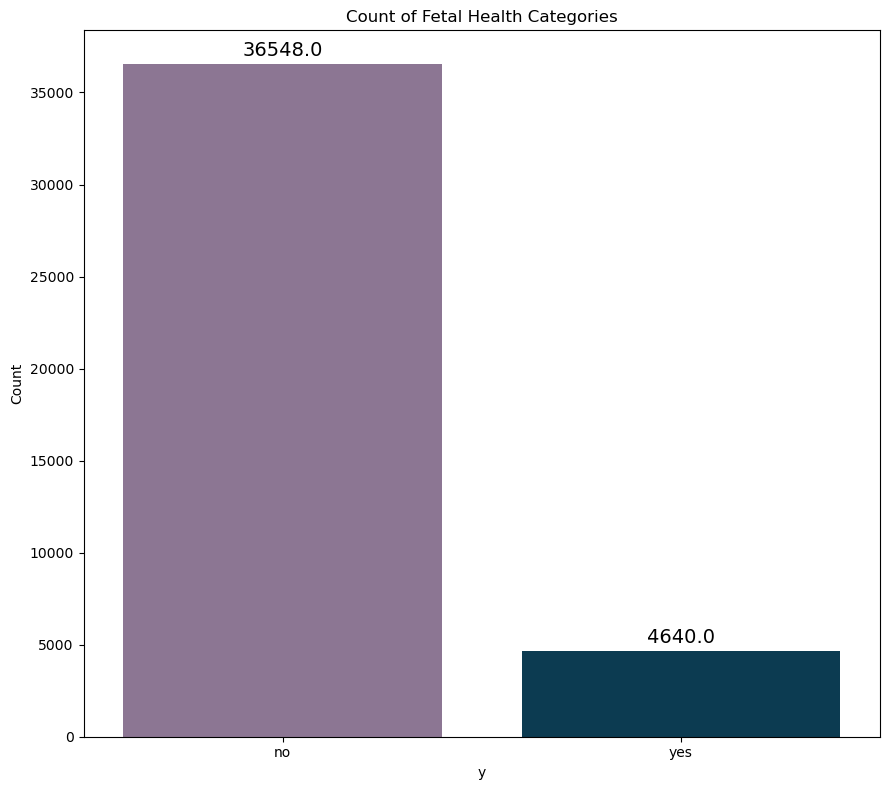

In [17]:
colours=["#8f7198", "#003f5c"]
plt.figure(figsize=(9,8))
ax = sns.countplot(data= df, x="y",palette=colours)
# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14, color='black')

# Set plot labels and title
ax.set_xlabel("y")
ax.set_ylabel("Count")
ax.set_title("Count of Fetal Health Categories")
plt.tight_layout()
plt.show()

In [18]:
df.y.value_counts(normalize=True)

no     0.887346
yes    0.112654
Name: y, dtype: float64

### <center><b><u><span style="color:#ff6600">OBSERVATIONS</span></u></b></center>

- (`no`) Class 1.0 has the highest percentage, accounting for approximately 88.7% of the data .
- (`yes`) Class 2.0 has a lower percentage, around 11.2%.



**This distribution suggests that the dataset is `imbalanced`, with a significant majority of instances belonging to Class 1.0 which is `no`.**

In [24]:
target_map = {
    'no': 0,
    'yes' : 1
}

df.loc[:, 'y'] = df.y.map(target_map)

<Figure size 1500x1500 with 0 Axes>

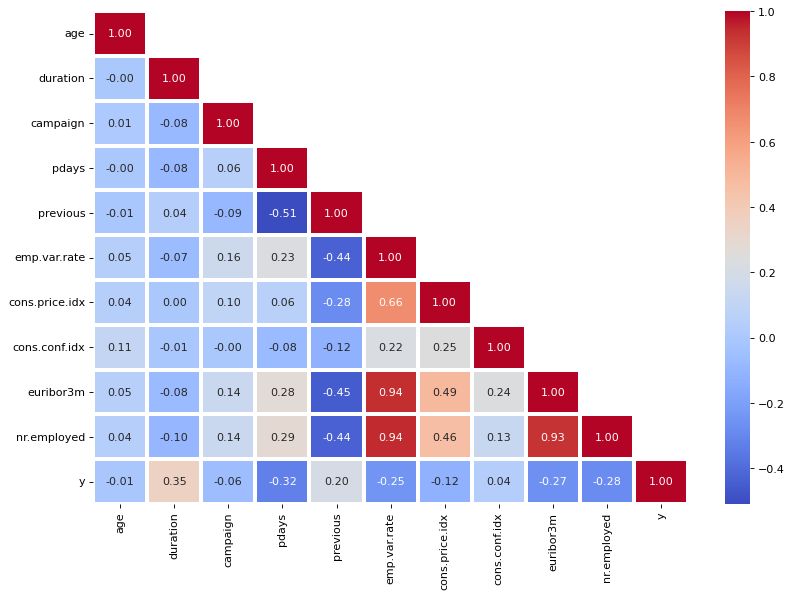

In [26]:
#correlation matrix
corrmat= df.corr(method='spearman')
plt.figure(figsize=(15,15))  

mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask,1)] = True

plt.figure(figsize=(12,8), dpi=80)
sns.heatmap(corrmat, mask=mask, annot=True, cmap="coolwarm", fmt='.2f', linewidths=2)
plt.show()

In [38]:
from sklearn import preprocessing

for cols in df.columns:
    if df[cols].dtype == "object":
        lbl_enc = preprocessing.LabelEncoder()
        df[cols] = lbl_enc.fit_transform(df[cols])
    else:
        continue

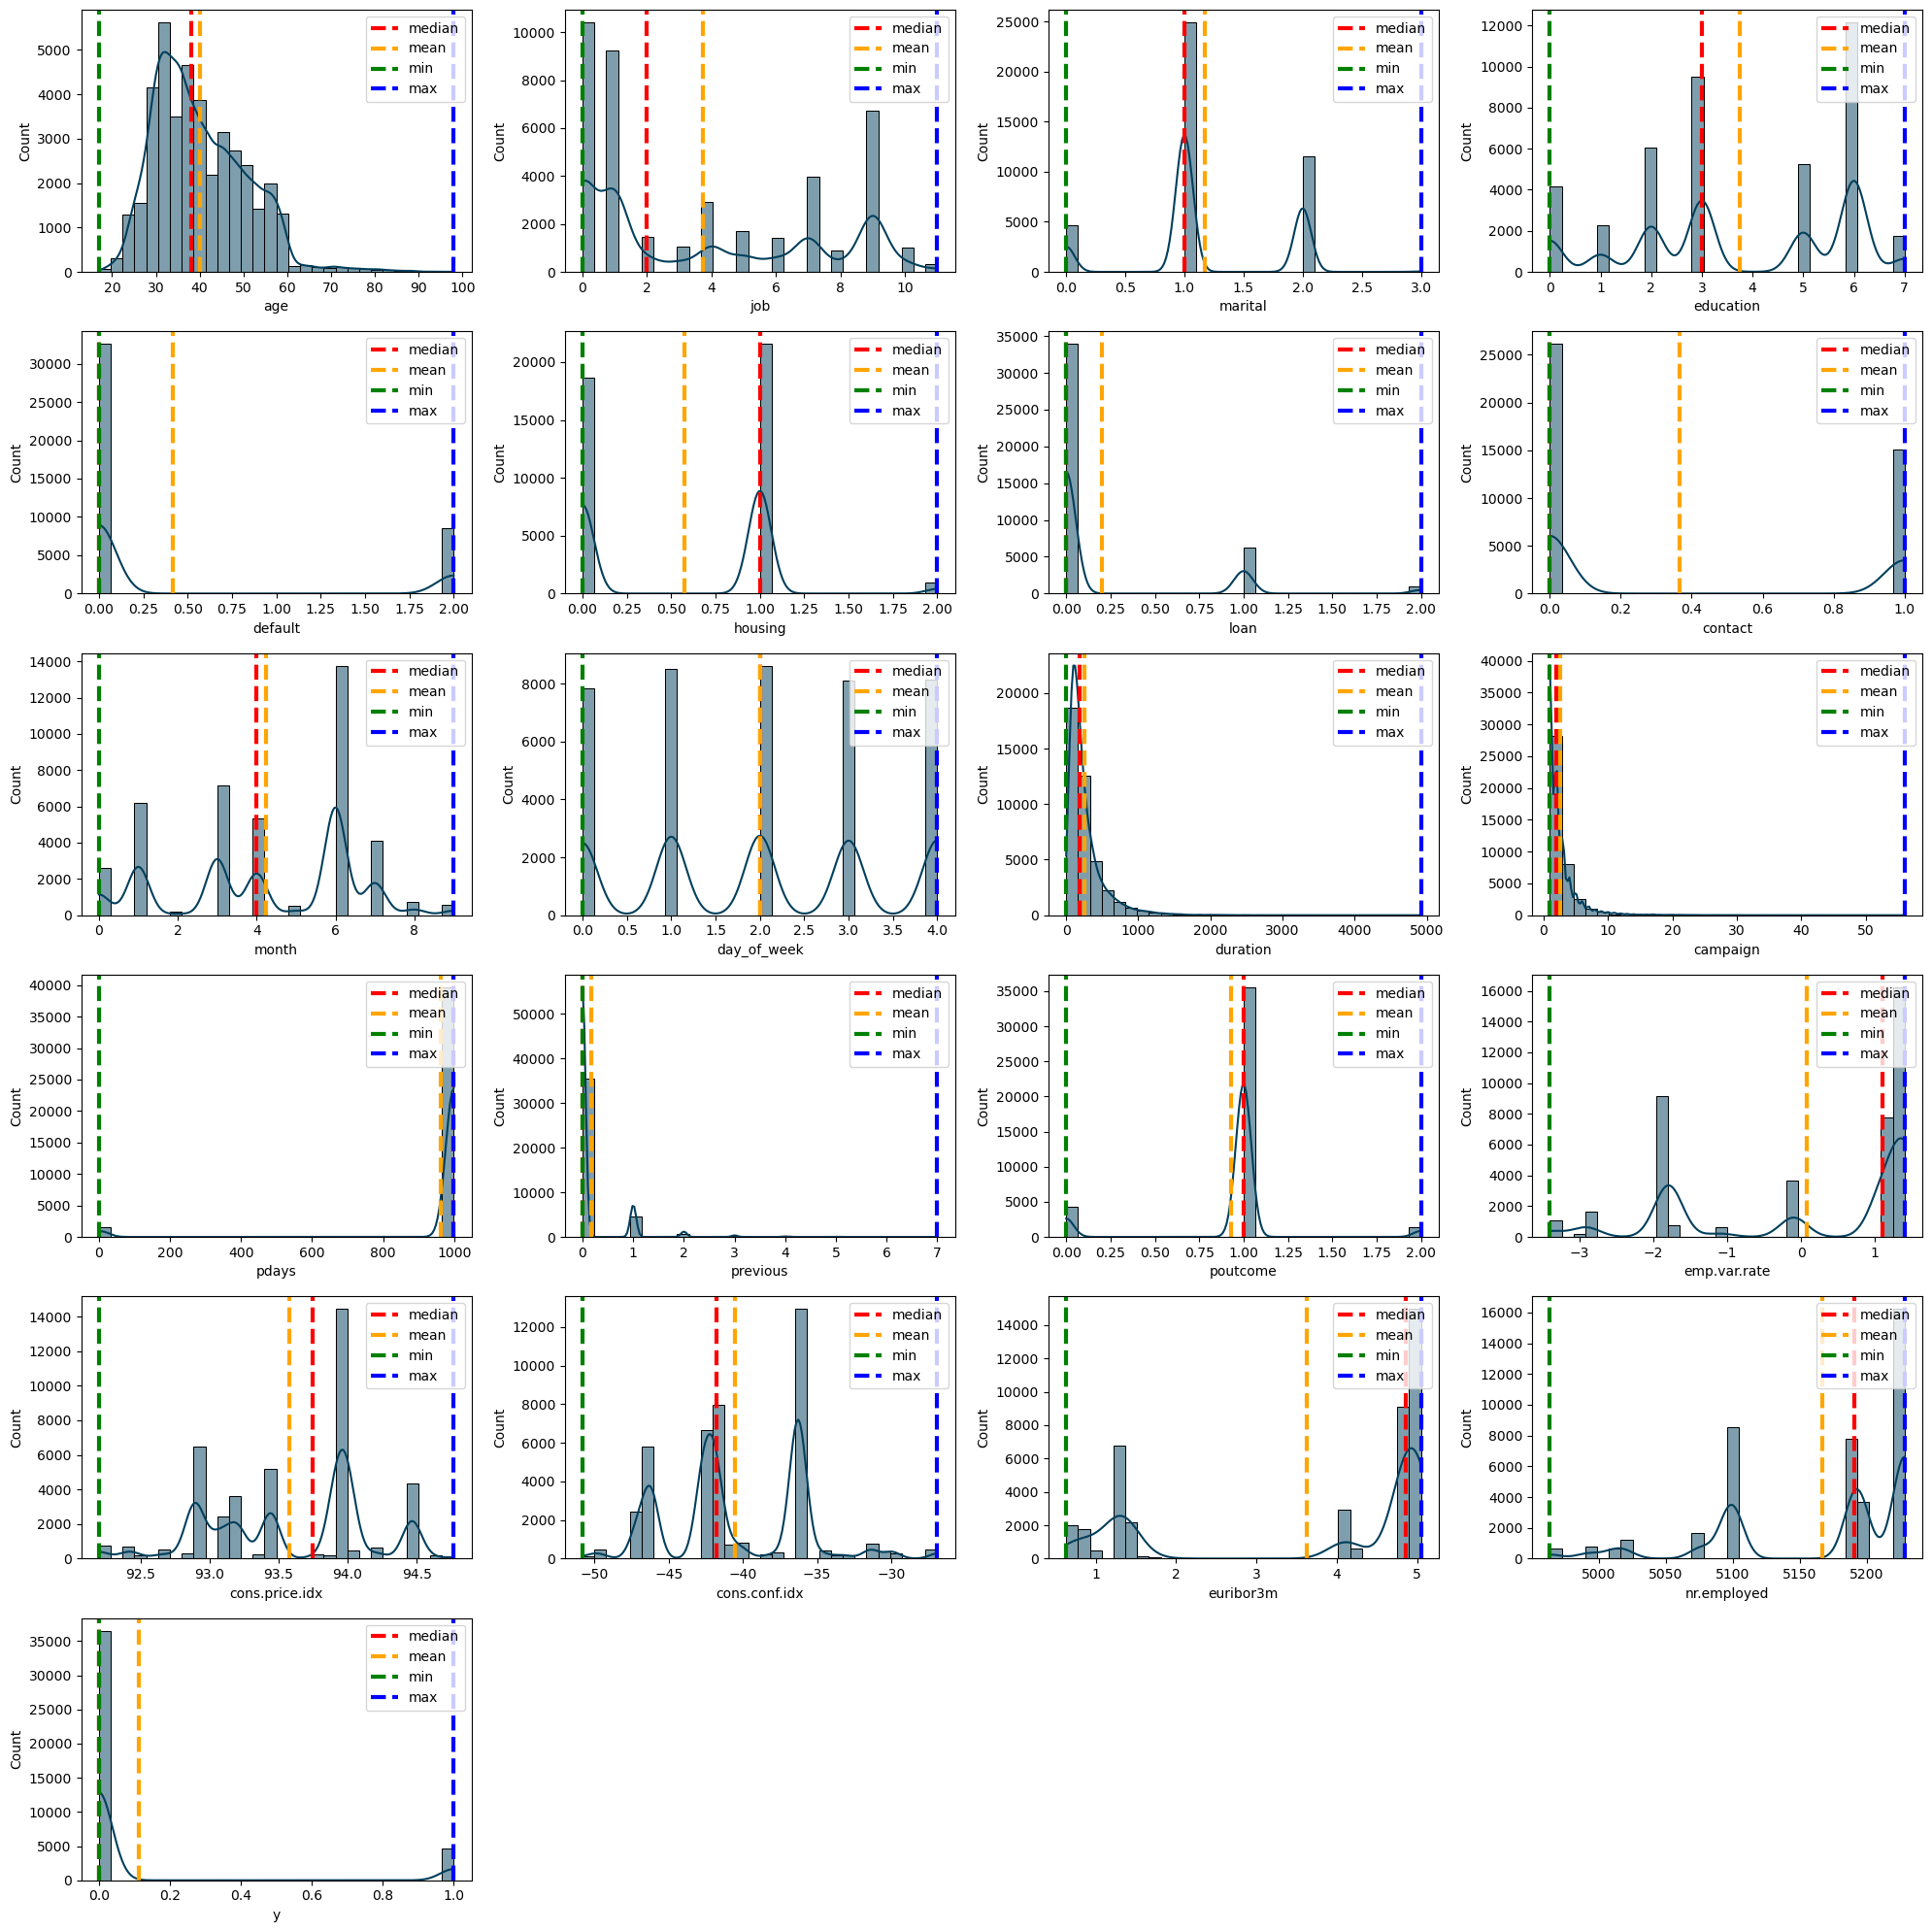

In [40]:
plt.figure(figsize=(20,20))
num_df = df.select_dtypes(include='number')
for i, cols in enumerate(num_df.columns):
    col_mean = num_df[cols].mean()
    col_median = num_df[cols].median()
    col_min = num_df[cols].min()
    col_max = num_df[cols].max()
    plt.subplot(6,4,i+1)

    ax = sns.histplot(num_df[cols], color=colours[1], bins=30, kde=True)
    # Add horizontal lines for median, min, max
    plt.axvline(x=col_median, color='r', linestyle='--', linewidth=3, label='median')
    plt.axvline(x=col_mean, color='orange', linestyle="--", linewidth=3, label='mean')
    plt.axvline(x=col_min, color='g', linestyle='--', linewidth=3, label='min')
    plt.axvline(x=col_max, color='b', linestyle='--', linewidth=3, label='max')
    plt.legend(loc='upper right')
    
plt.tight_layout()
plt.show()

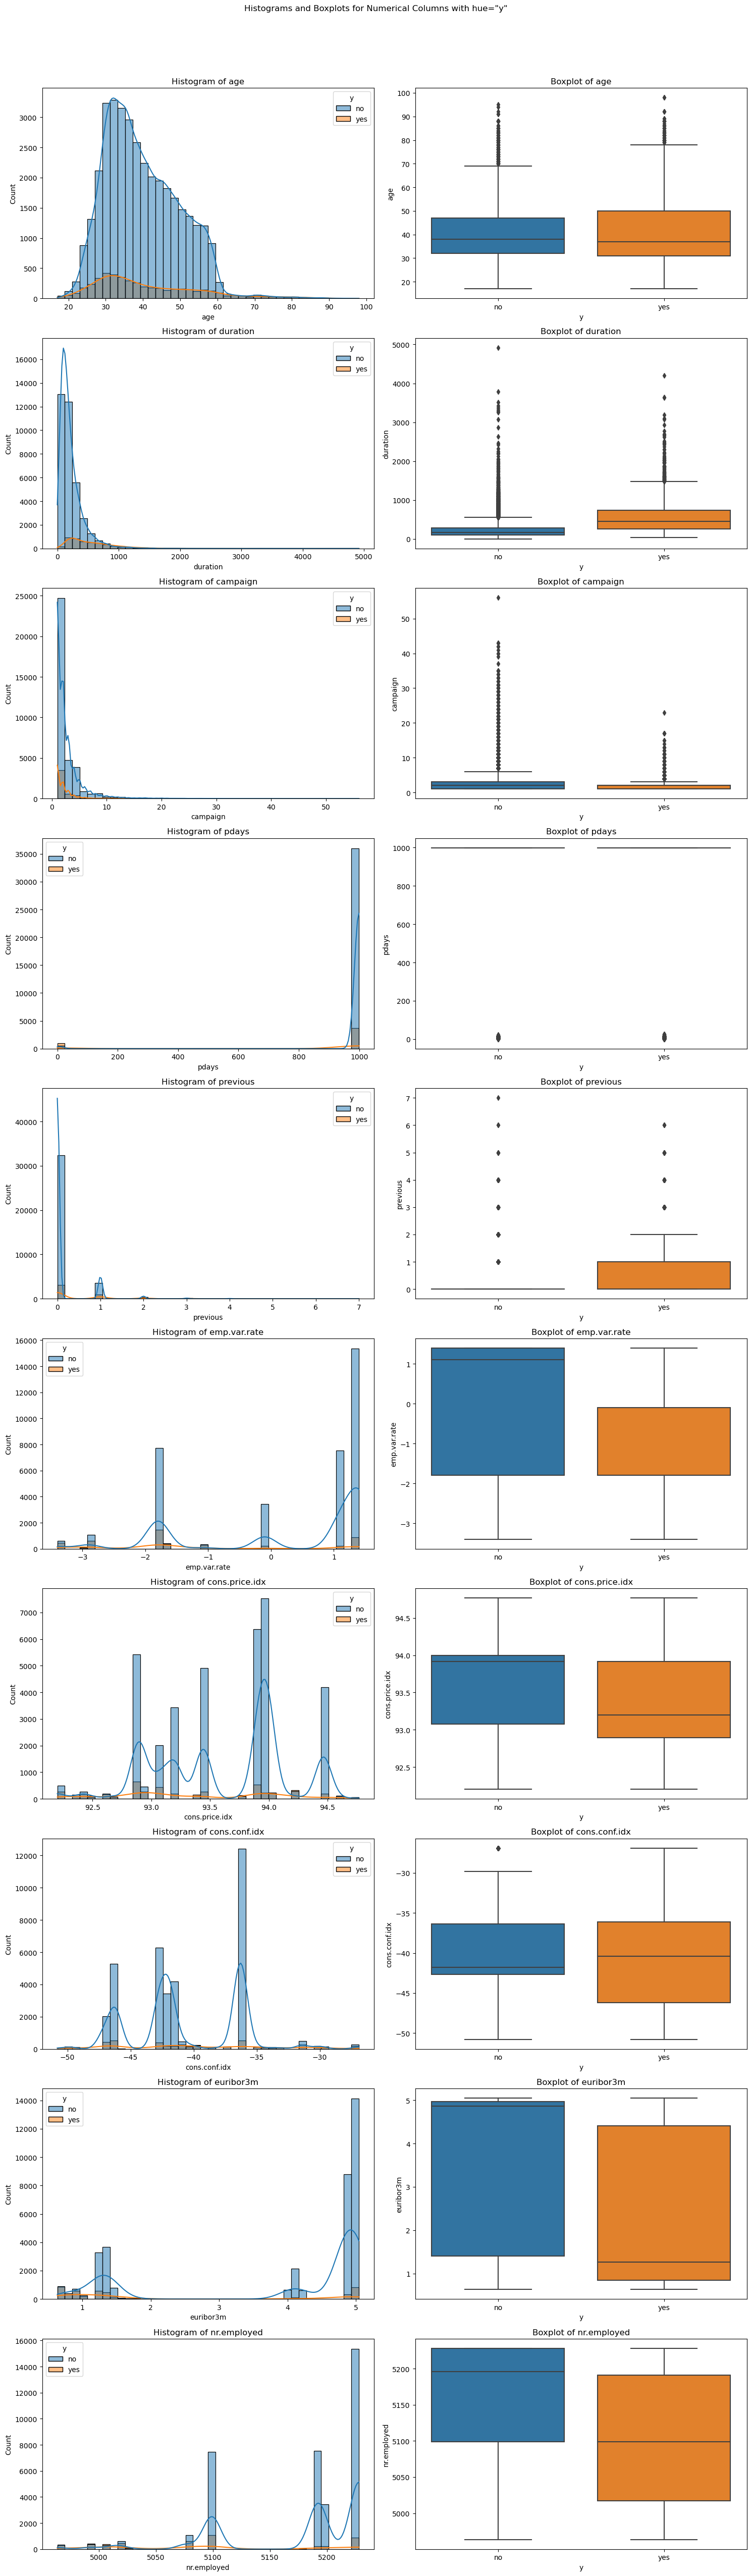

In [69]:
colours=["#f7b2b0","#8f7198", "#003f5c"]
# Separate numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for subplots
nrows = len(numerical_columns)
ncols = 2

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))

# Set the title for the entire plot
fig.suptitle('Histograms and Boxplots for Numerical Columns with hue="y"', y=1.02)

# Loop over each numerical column
for i, column in enumerate(numerical_columns):
    # Plot histogram with hue
    sns.histplot(data=df, x=column, hue='y', kde=True, ax=axes[i, 0], bins=40)
    axes[i, 0].set_title(f'Histogram of {column}')

    # Plot boxplot with hue
    sns.boxplot(data=df, x='y', y=column, ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

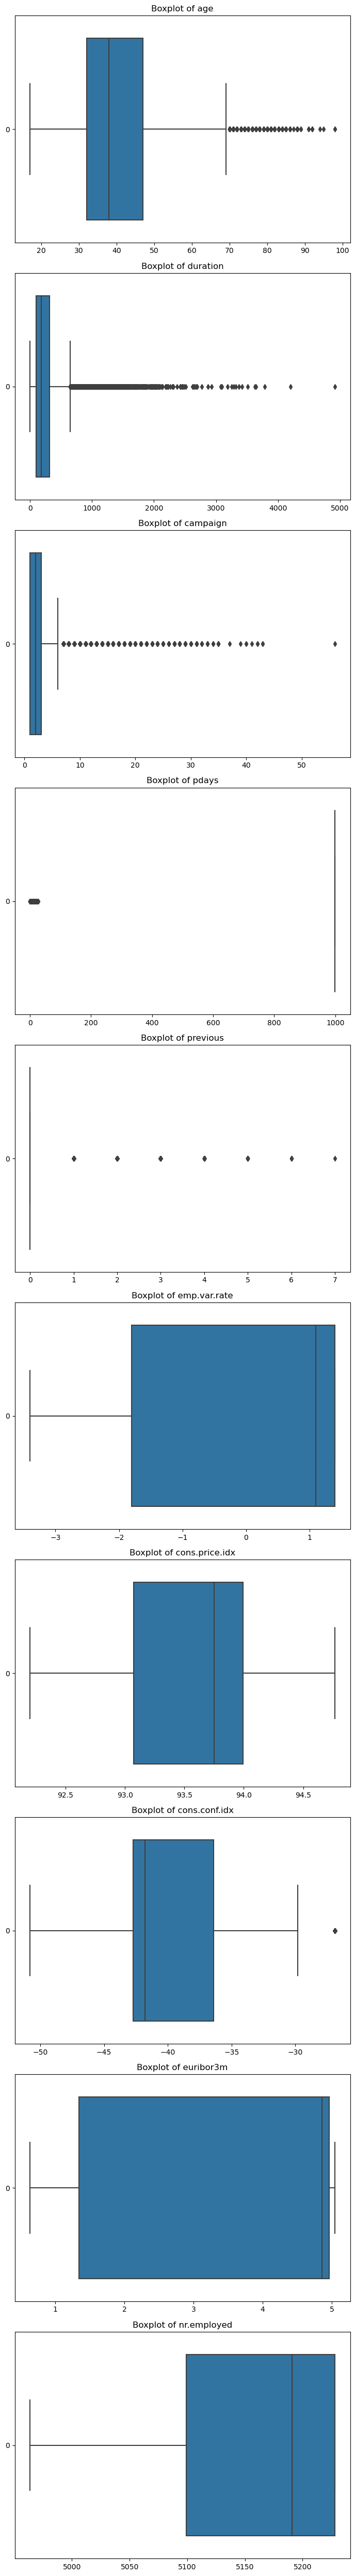

In [64]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for subplots
nrows = len(numerical_columns)
ncols = 1

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 5 * nrows))

# Loop over each numerical column
for i, column in enumerate(numerical_columns):
    # Plot boxplot
    sns.boxplot(data=df[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [66]:
# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the IQR for each numerical column
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers using the IQR method
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))

# Remove outliers
df_no_outliers = df[~outliers.any(axis=1)]

# Display the shape of the original and filtered datasets
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", df_no_outliers.shape)

Original dataset shape: (41188, 21)
Dataset shape after removing outliers: (30360, 21)


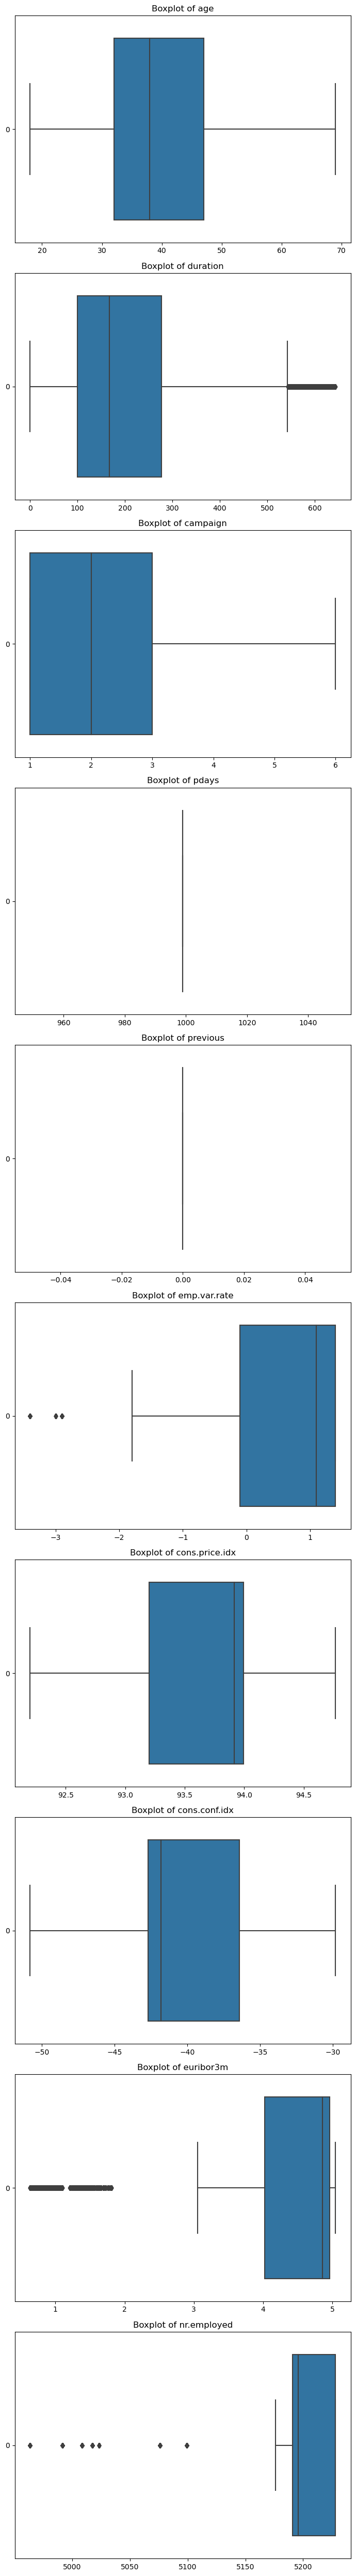

In [68]:
# Select numerical columns
numerical_columns = df_no_outliers.select_dtypes(include=['int64', 'float64']).columns

# Set the number of rows and columns for subplots
nrows = len(numerical_columns)
ncols = 1

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(7, 5 * nrows))

# Loop over each numerical column
for i, column in enumerate(numerical_columns):
    # Plot boxplot
    sns.boxplot(data=df_no_outliers[column], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {column}')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [71]:
df_folds = pd.read_csv("../input/folds_csv/bank_folds.csv")
df_folds.kfold.value_counts()

0    4119
7    4119
5    4119
4    4119
1    4119
2    4119
3    4119
6    4119
8    4118
9    4118
Name: kfold, dtype: int64

In [72]:
data = df_folds.groupby('kfold')['y'].agg({'value_counts'}).reset_index()   
data

,kfold,y,value_counts
0,0,no,3655
1,0,yes,464
2,1,no,3655
3,1,yes,464
4,2,no,3655
5,2,yes,464
6,3,no,3655
7,3,yes,464
8,4,no,3655
9,4,yes,464


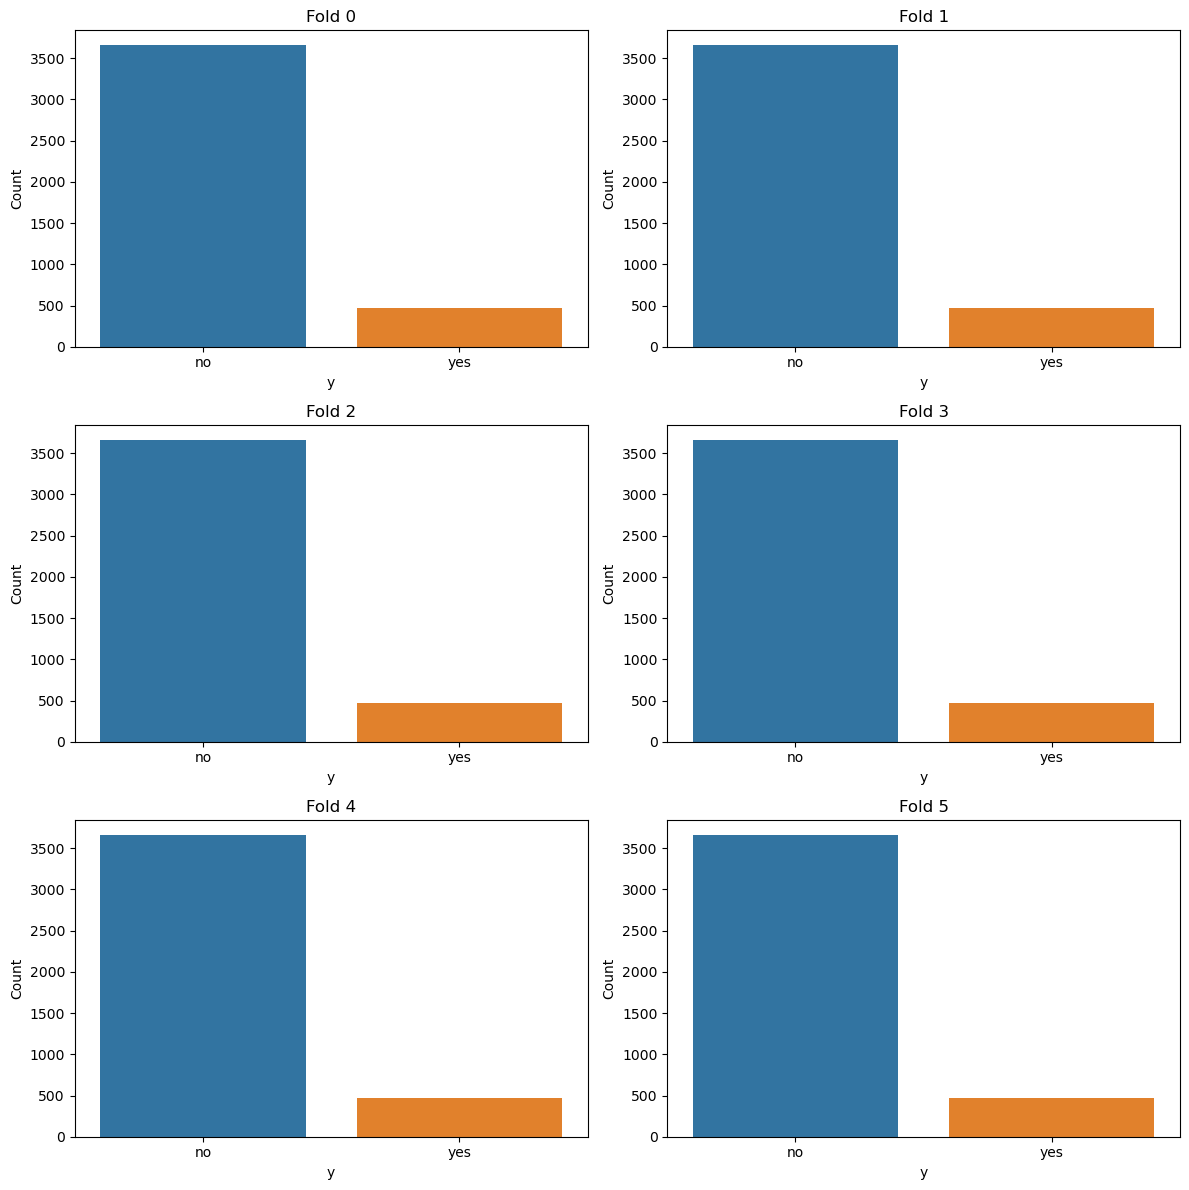

In [73]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot distribution for each fold
for i, ax in enumerate(axes.flat):
    fold_data = data[data['kfold'] == i]
    if not fold_data.empty:
        sns.barplot(data=fold_data, x='y', y='value_counts', ax=ax)
        ax.set_title(f'Fold {i}')
        ax.set_xlabel('y')
        ax.set_ylabel('Count')
        
    else:
        break

plt.tight_layout()
plt.show()

### <center><b><u><span style="color:#ff6600">OBSERVATIONS</span></u></b></center>

It seems like after using `StratifiedKFold` to create your folds, our target classes are distributed badly I would say. However, if the majority class (class 1.0) is significantly larger than the minority classes (classes 2.0 and 3.0), we still end up with `imbalanced folds`.

In order to address the issue let's use different Folds techniques and see can we get the same balanced distribution of classes in each folds.So, we can use:
- `StratifiedGroupKFold`
- `RepeatedStratifiedKFold`
- `StratifiedShuffleSplit`



Let's try some `Sampling techniques` like:
- Random Undersampling
- Random Oversampling

In [75]:
!pip install -U imbalanced-learn

In [81]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler

df = pd.read_csv("../input/raw_dataset/bank-additional/bank-additional-full.csv", sep=";")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
X = df.drop("y", axis=1)

y = df.y

oversampler = RandomOverSampler()
X_over, y_over = oversampler.fit_resample(X, y)

df_over = pd.concat(
    [
        pd.DataFrame(X_over, columns=X.columns), 
        pd.Series(y_over, name="y")
    ], 
    axis=1
)
df_over
df_over.to_csv("../input/oversampled_dataset.csv", index=False)


NameError: name 'df' is not defined

In [6]:
import pandas as pd 
oversampled_df = pd.read_csv('../input/oversampled_dataset.csv')

<AxesSubplot:>

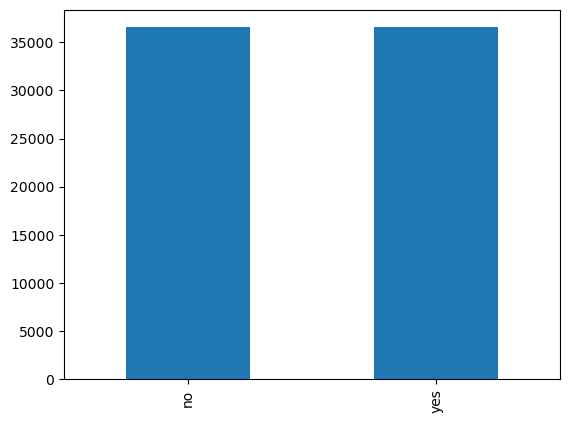

In [11]:
oversampled_df.y.value_counts().plot(kind='bar')

In [13]:
sampled_df = pd.read_csv("../input/folds_csv/oversampled_folds.csv")
sampled_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,kfold
0,60,unemployed,married,high.school,no,yes,no,cellular,apr,thu,...,2,1,success,-1.8,93.075,-47.1,1.365,5099.1,yes,8
1,86,retired,married,NaN,NaN,yes,no,cellular,sep,tue,...,999,0,nonexistent,-1.1,94.199,-37.5,0.877,4963.6,yes,6
2,44,services,married,NaN,no,no,yes,cellular,jun,mon,...,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes,9
3,45,management,married,NaN,no,yes,no,cellular,jul,fri,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,no,5
4,45,admin.,married,university.degree,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no,5


In [15]:
sampled_temp = sampled_df.groupby('kfold')['y'].agg({'value_counts'}).reset_index()

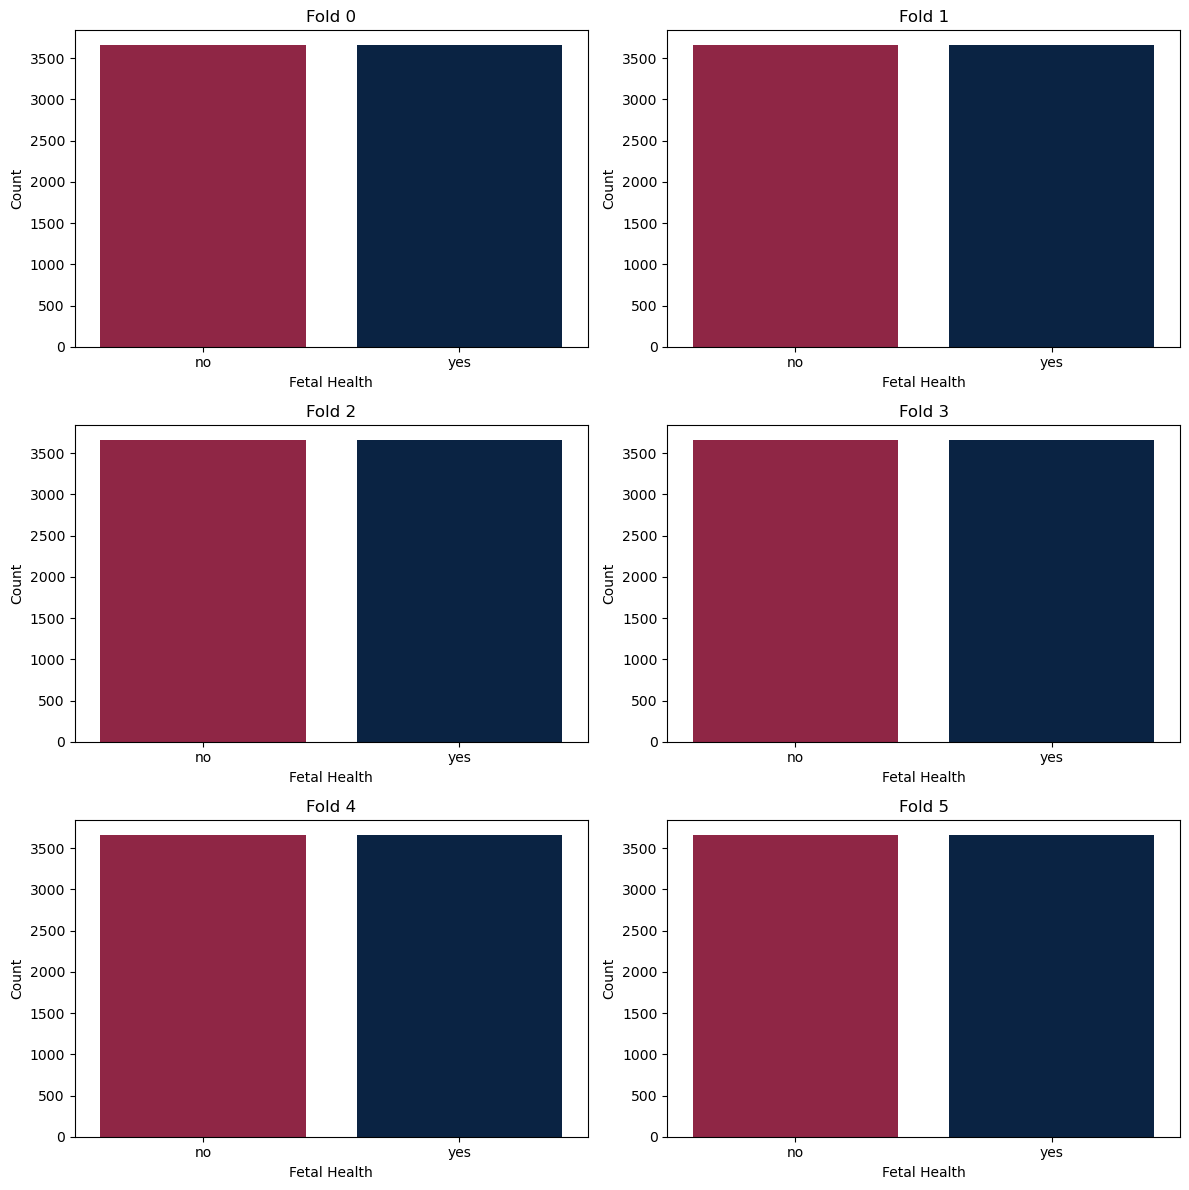

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#A0153E", "#00224D"]
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))

# Plot distribution for each fold
for i, ax in enumerate(axes.flat):
    fold_data = sampled_temp[sampled_temp['kfold'] == i]
    if not fold_data.empty:
        sns.barplot(data=fold_data, x='y', y='value_counts', ax=ax, palette=colors)
        ax.set_title(f'Fold {i}')
        ax.set_xlabel('Fetal Health')
        ax.set_ylabel('Count')
        
    else:
        break

plt.tight_layout()
plt.show()

### Equal distribution of classes in each fold after applying `random oversampling` indicates that the oversampling technique has successfully balanced the dataset. 

- Ensuring equal representation of all classes in each fold, the model can learn from and generalize to the entire dataset more effectively.